### IMPORTING THE NECESSARY LIBRARIES.

In [33]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

### LOADING THE DATASET.

In [34]:
ratings=pd.read_csv("C:/Users/HP/Downloads/ratings_Electronics.csv",names=['USER_ID','PRODUCT_ID','RATING','TIMESTAMP'])

In [35]:
ratings.head()

,USER_ID,PRODUCT_ID,RATING,TIMESTAMP
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### DROPPING THE TIMESTAMP COLUMN.

In [36]:
ratings=ratings.drop("TIMESTAMP",axis=1)

In [37]:
ratings

,USER_ID,PRODUCT_ID,RATING
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [38]:
rows, columns = ratings.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  7824482
No of columns:  3


#### THIS DATASET HAS 7824482 COLUMNS AND 3 ROWS.

### DATATYPE OF ALL THE ATTRIBUTES.

In [39]:
ratings.dtypes

USER_ID        object
PRODUCT_ID     object
RATING        float64
dtype: object

### CHECKING FOR MISSING VALUES.

In [40]:
print('Number of missing values across columns-\n', ratings.isnull().sum())

Number of missing values across columns-
 USER_ID       0
PRODUCT_ID    0
RATING        0
dtype: int64


#### THERE ARE NO MISSING VALUES PRESENT IN THE DATASET.

### 5 NUMBER SUMMARY OF THE DATA.

In [41]:
ratings['RATING'].describe().transpose()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: RATING, dtype: float64

In [42]:
print('The minimum rating is: %d' %(ratings['RATING'].min()))
print('The maximum rating is: %d' %(ratings['RATING'].max()))

The minimum rating is: 1
The maximum rating is: 5


#### THE RANGE OF RATINGS : 1-5. 
#### MINIMUM RATING PROVIDED BY THE USERS : 1
#### MAXIMUM RATING PROVIDED BY THE USERS : 5

### PLOTTING THE DISTRIBUTION AMONG THE RATINGS.

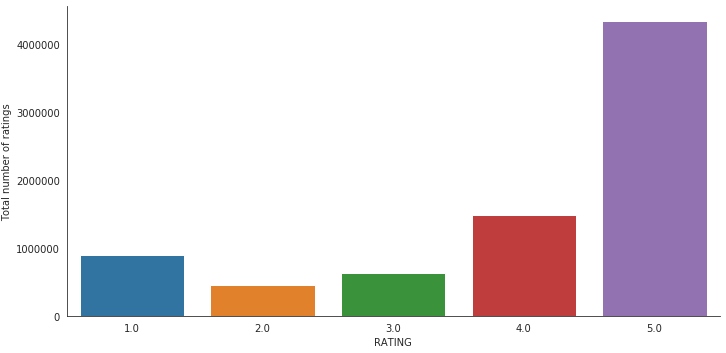

In [43]:
with sns.axes_style('white'):
    g = sns.factorplot("RATING", data=ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

#### AS WE CAN SEE:
 ####   5 IS THE MOST RATED.
  ####  2 IS THE LEAST RATED.

### EXTRACTING THE NUMBER OF UNIQUE USERS AND ITEMS.

In [44]:
print('Number of unique USERS in Raw data = ', ratings['USER_ID'].nunique())
print('Number of unique ITEMS in Raw data = ', ratings['PRODUCT_ID'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


### ELIMINATING THE SPARSE DATA.

### EXTRACTING THE FIRST 50 USERS WHO HAVE RATED THE MOST.

In [45]:
most_rated = ratings.groupby('USER_ID').size().sort_values(ascending=False)[:50]
most_rated

USER_ID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
A1T1YSCDW0PD25    227
A3CW0ZLUO5X2B1    227
A2UOHALGF2X77Q    227
A250AXLRBVYKB4    226
A4WEZJOIZIV4U     225
A1CMD08Z49PGKQ    221
A1VQHH85U7PX0     220
AOEAD7DPLZE53     218
A1J75JJ0Q2OEJN    218
A11KZ906QD08C5    216
A20DZX38KRBIT8    213
A1F9Z42CFF9IAY    213
AVPNQUVZWMDSX     212
A3OA4DV4L81N1D    209
A1EVV74UQYVKRY    208
AT

### EXTRACTING THE USERS WHO HAVE RATED 200 OR MORE TIMES.

In [46]:
counts = ratings['USER_ID'].value_counts()
ratings_final = ratings[ratings['USER_ID'].isin(counts[counts >=200].index)]

In [47]:
ratings_final.shape

(13862, 3)

In [48]:
print('Number of users who have rated  more than 200 times =', len(ratings_final))
print('Number of unique USERS in final data = ', ratings_final['USER_ID'].nunique())
print('Number of unique ITEMS in final data = ', ratings_final['PRODUCT_ID'].nunique())

Number of users who have rated  more than 200 times = 13862
Number of unique USERS in final data =  52
Number of unique ITEMS in final data =  9673


#### 'ratings_final' HAVE THE USERS WHO HAVE RATED 200 OR MORE TIMES.

### CALCULATING THE DENSITY OF THE RATING MATRIX.

In [49]:
final_ratings_matrix = ratings_final.pivot(index = 'USER_ID', columns ='PRODUCT_ID', values = 'RATING').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (52, 9673)
given_num_of_ratings =  13862
possible_num_of_ratings =  502996
density: 2.76%


In [50]:
final_ratings_matrix.head()

PRODUCT_ID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
USER_ID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

USER_ID,A11I1I9QLMAM1A,A11KZ906QD08C5,A12DQZKRKTNF5E,A17BUUBOU0598B,A1CMD08Z49PGKQ,A1EH2S92FHWZRP,A1EVV74UQYVKRY,A1EXGL6L0QQ0M5,A1F9Z42CFF9IAY,A1J75JJ0Q2OEJN,...,A680RUE1FDO8B,A6FIAB28IS79,ADLVFFE4VBT8,AEJAGHLC675A7,AGVWTYW0ULXHT,AOEAD7DPLZE53,ARBKYIVNYWK3C,AT6CZDCP4TRGA,AVPNQUVZWMDSX,AWPODHOB4GFWL
PRODUCT_ID,,,,,,,,,,,,,,,,,,,,,
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400699169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9043413585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9800359788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981719005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SPLITTING THE DATA INTO TRAINING AND TEST SET.

In [52]:
train_data, test_data = train_test_split(ratings_final, test_size = 0.3, random_state=0)
train_data.head()

,USER_ID,PRODUCT_ID,RATING
4089445,A1EVV74UQYVKRY,B004G6002M,5.0
7403352,A12DQZKRKTNF5E,B00DJNCS6O,4.0
4795978,AVPNQUVZWMDSX,B005B3VO24,5.0
2075888,ARBKYIVNYWK3C,B001IAYUM0,5.0
3327479,A1VQHH85U7PX0,B003EYV224,4.0


In [53]:
train_data.shape

(9703, 3)

In [54]:
test_data.shape

(4159, 3)

### BUILDING A POPULARITY RECOMMENDER MODEL.

In [55]:
train_data_grouped = train_data.groupby('PRODUCT_ID').agg({'USER_ID': 'count'}).reset_index()
train_data_grouped.rename(columns = {'USER_ID': 'score'},inplace=True)
train_data_grouped.head()

,PRODUCT_ID,score
0,1400532655,1
1,1400699169,1
2,9043413585,1
3,9800359788,1
4,9981719005,1


### GETTING THE TOP 5 POPULAR RATED PRODUCTS.

In [56]:
train_data_sort = train_data_grouped.sort_values(['score', 'PRODUCT_ID'], ascending = [0,1]) 
       
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 

popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,PRODUCT_ID,score,Rank
1676,B000JMJWV2,15,1.0
3912,B003ES5ZUU,12,2.0
4368,B004CLYEDC,11,3.0
5559,B00829THK0,11,4.0
6024,B00A1DJO12,11,5.0


#### THESE ARE TOP 5 RECOMMENDED PRODUCTS BASED ON POPULARITY.

### USING POPULARITY BASED RECOMMENDER TO MAKE PREDICTIONS.

In [74]:
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
  
    user_recommendations['USER_ID'] = user_id 
 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

### FINDING RECOMMENDATIONS FOR PARTICULAR USERS.

In [58]:
find_recom = [15,121,53]  
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

      USER_ID  PRODUCT_ID  score  Rank
1676       15  B000JMJWV2     15   1.0
3912       15  B003ES5ZUU     12   2.0
4368       15  B004CLYEDC     11   3.0
5559       15  B00829THK0     11   4.0
6024       15  B00A1DJO12     11   5.0


Here is the recommendation for the userId: 121

      USER_ID  PRODUCT_ID  score  Rank
1676      121  B000JMJWV2     15   1.0
3912      121  B003ES5ZUU     12   2.0
4368      121  B004CLYEDC     11   3.0
5559      121  B00829THK0     11   4.0
6024      121  B00A1DJO12     11   5.0


Here is the recommendation for the userId: 53

      USER_ID  PRODUCT_ID  score  Rank
1676       53  B000JMJWV2     15   1.0
3912       53  B003ES5ZUU     12   2.0
4368       53  B004CLYEDC     11   3.0
5559       53  B00829THK0     11   4.0
6024       53  B00A1DJO12     11   5.0




#### WE CAN SEE THAT THE RECOMMENDATIONS ARE SAME FOR ALL THE USERS REGARDLESS THEIR USERID's .
#### SINCE IT IS POPULARITY BASED RECOMMENDATION MODEL IT IS NOT PERSONALISED TO SPECIFIC USERS OR ITEMS.
#### IT GIVES A GENARALISED RECCOMENDATIONS TO ALL THE USERS.

### BUILDING A COLLABARATIVE FILTERING MODEL.

### MODEL BASED COLLABARATIVE FILTERING USING SVD.

In [59]:
ratings_CF = pd.concat([train_data, test_data]).reset_index()
ratings_CF.head()

,index,USER_ID,PRODUCT_ID,RATING
0,4089445,A1EVV74UQYVKRY,B004G6002M,5.0
1,7403352,A12DQZKRKTNF5E,B00DJNCS6O,4.0
2,4795978,AVPNQUVZWMDSX,B005B3VO24,5.0
3,2075888,ARBKYIVNYWK3C,B001IAYUM0,5.0
4,3327479,A1VQHH85U7PX0,B003EYV224,4.0


### USER BASED COLLABRATIVE FILTERING.

In [60]:
pivot_ratings = ratings_CF.pivot(index = 'USER_ID', columns ='PRODUCT_ID', values = 'RATING').fillna(0)
pivot_ratings.shape
pivot_ratings.head()

PRODUCT_ID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
USER_ID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
pivot_ratings['USER_INDEX'] = np.arange(0, pivot_ratings.shape[0], 1)
pivot_ratings.head()

PRODUCT_ID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8,USER_INDEX
USER_ID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


#### ACTUAL RATINGS GIVEN BY THE USERS.

In [62]:
pivot_ratings.set_index(['USER_INDEX'], inplace=True)
pivot_ratings.head()

PRODUCT_ID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
USER_INDEX,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SINGULAR VALUE DECOMPOSITION.

In [77]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_ratings, k = 10)
sigma = np.diag(sigma)

#### PREDICTED RATINGS.

In [78]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_ratings = pd.DataFrame(all_user_predicted_ratings, columns = pivot_ratings.columns)
preds_ratings.head()

PRODUCT_ID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
0,-0.012000,0.114113,0.071882,0.205474,0.121252,0.020205,0.021973,0.070338,0.223924,0.069226,...,0.151689,0.314467,0.190984,0.007439,0.822226,0.100757,0.120019,0.103454,0.109109,0.018149
1,-0.001117,0.067839,0.044157,0.087031,-0.011565,0.012597,0.075473,0.037046,0.136408,0.043112,...,0.022013,0.005458,-0.003732,-0.056899,0.285667,0.056479,0.016093,-0.044025,-0.092054,-0.052397
2,-0.003182,0.037187,0.026930,0.169114,0.085230,0.007734,-0.022277,0.065654,0.079180,0.062734,...,0.757488,0.650691,0.590773,0.110989,1.032712,0.039722,0.164303,0.242431,0.355735,0.229561
3,-0.004415,0.056826,0.033211,0.079297,0.150307,0.009338,0.163850,0.035837,0.085494,0.031686,...,0.207394,0.033930,0.085801,-0.055344,0.628556,0.051591,-0.009771,-0.063160,-0.104409,-0.022564
4,-0.013488,0.182096,0.098180,0.089350,-0.073983,0.029672,-0.195888,0.112769,0.370699,0.142921,...,0.353159,0.350281,0.300631,-0.058374,0.802472,0.132512,0.134518,0.049240,-0.073907,-0.041970


#### RECOMMENDING PRODUCTS WITH HIGHEST PREDICTED RATINGS.

In [79]:
def recommend_items(userID, pivot_ratings, preds_ratings, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_ratings.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_ratings.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

### EXTRACTING RECOMMENDATION FOR A PARTICULAR USER ( HERE, EXAMPLE USER WITH USER_ID=8).

In [80]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_ratings, preds_ratings, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
B003ES5ZUU                  0.0          0.890963
B004CLYEH8                  0.0          0.882391
B0088CJT4U                  0.0          0.868428
B00BOHNYTW                  0.0          0.851113
B004CLYEDC                  0.0          0.804318


### EVALUATING THE MODEL BASED SVD MODEL.

#### ACTUAL RATINGS GIVEN BY THE USER.

In [81]:
final_ratings_matrix.head()

PRODUCT_ID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
USER_ID,,,,,,,,,,,,,,,,,,,,,
A11I1I9QLMAM1A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DQZKRKTNF5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CMD08Z49PGKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### AVERAGE ACTUAL RATING FOR EACH PRODUCT.

In [82]:
final_ratings_matrix.mean().head()

PRODUCT_ID
1400532655    0.019231
1400699169    0.096154
9043413585    0.057692
9800359788    0.096154
9981719005    0.057692
dtype: float64

#### PREDICTED RATINGS.

In [83]:
preds_ratings.head()

PRODUCT_ID,1400532655,1400699169,9043413585,9800359788,9981719005,998376234X,B000001OMI,B000001ON0,B00000DM9M,B00000DM9W,...,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LGQ6HL8,B00LI4ZZO8
0,-0.012000,0.114113,0.071882,0.205474,0.121252,0.020205,0.021973,0.070338,0.223924,0.069226,...,0.151689,0.314467,0.190984,0.007439,0.822226,0.100757,0.120019,0.103454,0.109109,0.018149
1,-0.001117,0.067839,0.044157,0.087031,-0.011565,0.012597,0.075473,0.037046,0.136408,0.043112,...,0.022013,0.005458,-0.003732,-0.056899,0.285667,0.056479,0.016093,-0.044025,-0.092054,-0.052397
2,-0.003182,0.037187,0.026930,0.169114,0.085230,0.007734,-0.022277,0.065654,0.079180,0.062734,...,0.757488,0.650691,0.590773,0.110989,1.032712,0.039722,0.164303,0.242431,0.355735,0.229561
3,-0.004415,0.056826,0.033211,0.079297,0.150307,0.009338,0.163850,0.035837,0.085494,0.031686,...,0.207394,0.033930,0.085801,-0.055344,0.628556,0.051591,-0.009771,-0.063160,-0.104409,-0.022564
4,-0.013488,0.182096,0.098180,0.089350,-0.073983,0.029672,-0.195888,0.112769,0.370699,0.142921,...,0.353159,0.350281,0.300631,-0.058374,0.802472,0.132512,0.134518,0.049240,-0.073907,-0.041970


#### AVERAGE PREDICTED RATING FOR EACH PRODUCT.

In [84]:
preds_ratings.mean().head()

PRODUCT_ID
1400532655    0.021808
1400699169    0.069867
9043413585    0.041554
9800359788    0.123189
9981719005    0.068208
dtype: float64

### IMPLEMENTATING RMSE FOR EVALUATION.

In [85]:
rmse_ratings = pd.concat([final_ratings_matrix.mean(), preds_ratings.mean()], axis=1)
rmse_ratings.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_ratings.shape)
rmse_ratings['Product_index'] = np.arange(0, rmse_ratings.shape[0], 1)
rmse_ratings.head()

(9673, 2)


,Avg_actual_ratings,Avg_predicted_ratings,Product_index
PRODUCT_ID,,,
1400532655,0.019231,0.021808,0
1400699169,0.096154,0.069867,1
9043413585,0.057692,0.041554,2
9800359788,0.096154,0.123189,3
9981719005,0.057692,0.068208,4


In [86]:
RMSE = round((((rmse_ratings.Avg_actual_ratings - rmse_ratings.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.03662 



#### AS WE CAN SEE THAT OUR MODEL PERFORMANCE IS WELL AND THE ERROR IS LESS.

### EXTRACTING RECOMMENDATION FOR A PARTICULAR USER ( EXAMPLE  USER WITH USER_ID 44 & 18).
### NUMBER OF RECOMMENDATIONS(K=5).

In [91]:
userID = 44
num_recommendations = 5
recommend_items(userID, pivot_ratings, preds_ratings, num_recommendations)


Below are the recommended items for user(user_id = 44):

                   user_ratings  user_predictions
Recommended Items                                
B007WTAJTO                  0.0          0.695227
B009SYZ8OC                  0.0          0.688683
B00IX2VGFA                  0.0          0.687952
B001V9KG0I                  0.0          0.623399
B003ES5ZUU                  0.0          0.582743


#### AS WE CAN SEE THAT THE MODEL RECOMMENDS FIVE ITEMS TO THE USER 44.

In [ ]:
userID =18
num_recommendations = 5
recommend_items(userID, pivot_ratings, preds_ratings, num_recommendations)

#### AS WE CAN SEE THAT THE MODEL RECOMMENDS FIVE ITEMS TO THE USER 18.

## SUMMARIZING INSIGHTS.

### AS WE CAN NOTICE THROUGH THIS PROJECT :
###    THE POPULARITY BASED RECOMMENDATION SYSTEM GIVES US A GENERALISED OUTPUT FOR ALL THE USERS REGARDLESS OF THEIR INTERESTS.
###    WHILE THE COLLABARATIVE FILTERING BASED RECOMMENDATION MODEL GIVES US SPECIFIC RECOMMENDATIONS FOR A PARTICULAR USER.
###    WE CAN CLEARLY SEE THAT THE RECOMMENDATION FOR USER 44 IS DIFFERENT THAN THAT OF USER 18.
